In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

json = pd.read_json ('https://pomber.github.io/covid19/timeseries.json')

In [9]:
def plot_country(country):
    df = pd.json_normalize(json[country])
    diff = df[['confirmed']].diff()[1:]
    df = df[1:]
    discharged = df.recovered+df.deaths
    
    print(df.tail(1).to_string(index=False))
    print('new',diff.tail(1).to_string(index=False))

    plt.figure(figsize=(8,4))
    plt.plot(df.confirmed,label='confirmed')
    plt.plot(df.recovered,c='g',label='recovered')
    plt.plot(df.deaths,c='r',label='deaths')
    plt.plot(discharged,dashes=[2,2,6, 2],c='y',label='discharged')
    plt.title(country)
    plt.xlabel('day')
    plt.legend(loc='upper left')
    plt.show()
    
    plt.figure(figsize=(8,4))
    plt.scatter(df.confirmed,diff.confirmed)
    model = np.poly1d(np.polyfit(df.confirmed, diff.confirmed, 3))
    xp = np.linspace(df.confirmed.min(), df.confirmed.max(), 100)
    plt.plot(xp, model(xp), c='r')
    plt.title(country)
    plt.xlabel('confirmed')
    plt.ylabel('new confirmed per day')
    plt.show()
    
    print('discharged: ',discharged.iloc[-1])
    print('deaths: ',df.deaths.iloc[-1])
    print('%: ',(df.deaths.iloc[-1]/discharged.iloc[-1]*100))

    plt.figure(figsize=(8,4))
    plt.scatter(df.recovered+df.deaths,df.deaths)
    plt.title(country)
    plt.xlabel('discharged')
    plt.ylabel('deaths')
    plt.show()


      date  confirmed  deaths  recovered
 2020-3-30       1524       9        229
new  confirmed
     136.0


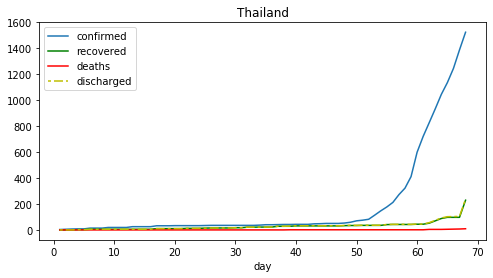

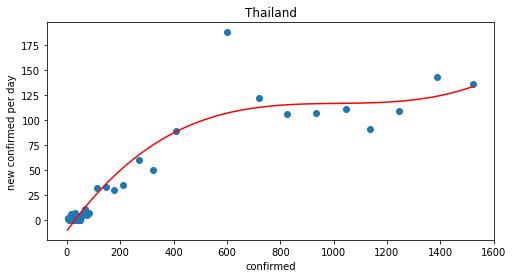

discharged:  238
deaths:  9
%:  3.7815126050420167


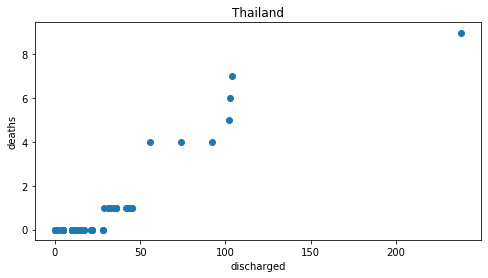

      date  confirmed  deaths  recovered
 2020-3-30     161807    2978       5644
new  confirmed
   20921.0


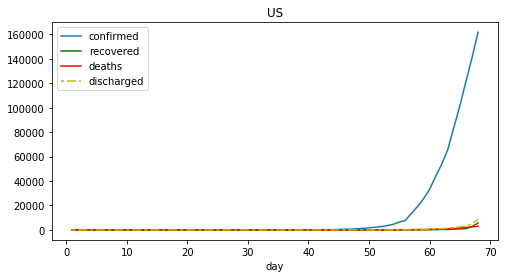

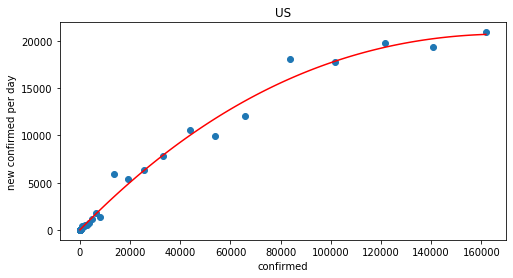

discharged:  8622
deaths:  2978
%:  34.53954998840176


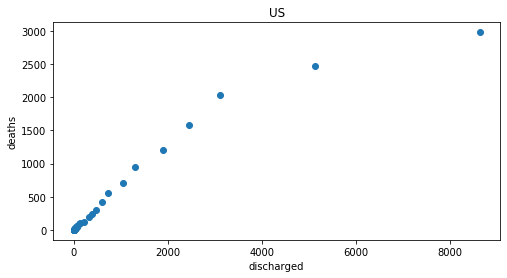

      date  confirmed  deaths  recovered
 2020-3-30      82198    3308      75923
new  confirmed
      76.0


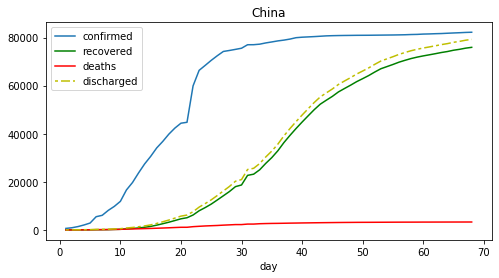

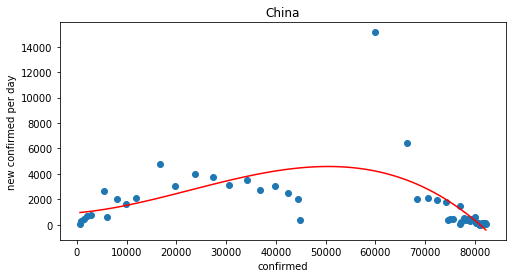

discharged:  79231
deaths:  3308
%:  4.175133470485037


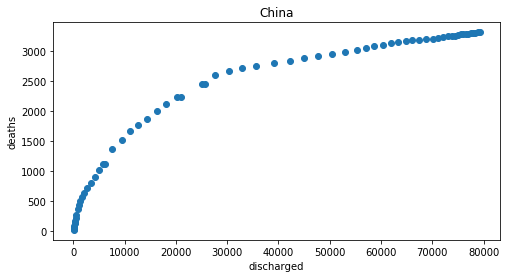

      date  confirmed  deaths  recovered
 2020-3-30     101739   11591      14620
new  confirmed
    4050.0


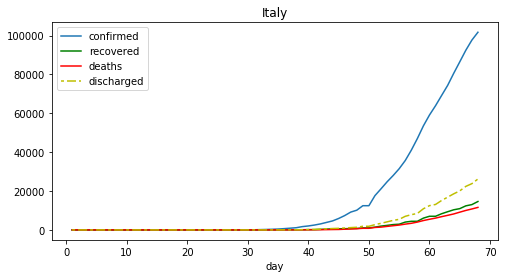

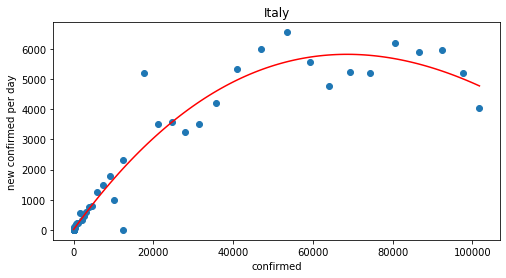

discharged:  26211
deaths:  11591
%:  44.221891572240665


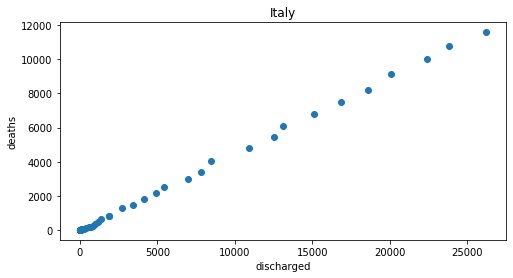

In [12]:
for c in ['Thailand','US','China','Italy']:
    plot_country(c)
